# Step#0: Problem Statement:
- The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

- The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

# Step#1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step#2: Import Dataset

In [2]:
spam_df=pd.read_csv(r"C:\Users\mmanasanjani\Desktop\Extra\MK\RWMLP\Project 6\emails.csv")

In [3]:
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [5]:
spam_df.tail(10)

,text,spam
5718,"Subject: altos na gas model kim , i know you ...",0
5719,Subject: power market research i came across ...,0
5720,Subject: re : visit to houston fyi - - - - -...,0
5721,Subject: ees risk management presentations for...,0
5722,Subject: re : vacation vince : i just found ...,0
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [6]:
spam_df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [7]:
spam_df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [8]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# Step#2: Visualize Dataset

In [11]:
ham=spam_df[spam_df['spam']==0]

In [12]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [13]:
spam=spam_df[spam_df['spam']==1]

In [14]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [16]:
print('Spam Percentage=',len(spam)/len(spam_df)*100,'%')

Spam Percentage= 23.88268156424581 %


In [18]:
print('Ham Percentage=',len(ham)/len(spam_df)*100,'%')

Ham Percentage= 76.11731843575419 %


In [20]:
spam_df['spam']

0       1
1       1
2       1
3       1
4       1
       ..
5723    0
5724    0
5725    0
5726    0
5727    0
Name: spam, Length: 5728, dtype: int64

<Axes: xlabel='spam', ylabel='count'>

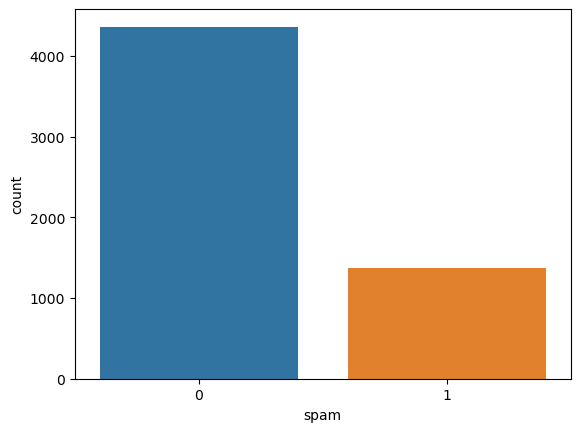

In [30]:
sns.countplot(x=spam_df['spam'], label='Count Spam vs Ham')

# Step#3: Create Training/Testing Data (Data Cleansing)

# Count Vectorizer Example

In [48]:
#to translate message into numbers, to perform sentiment analysis
from sklearn.feature_extraction.text import CountVectorizer
sample_data=['This is the first document','This document is the second document','And this is the third one','Is this the first document??']

sample_vectorizer=CountVectorizer()

In [49]:
sample_vectorizer.fit_transform(sample_data)

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [50]:
X=sample_vectorizer.fit_transform(sample_data)

In [51]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [52]:
print(sample_vectorizer.get_feature_names_out()) #alphabetically sorted

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


# Lets apply CountVectorizer to Spam/Ham Sample

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()

spamham_countvectorizer=vectorizer.fit_transform(spam_df['text'])

In [59]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [60]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [61]:
spamham_countvectorizer.shape

(5728, 37303)

# Step#4: Training the Model

In [62]:
label=spam_df['spam'].values

In [63]:
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [65]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier=MultinomialNB()

NB_classifier.fit(spamham_countvectorizer,label)

MultinomialNB()

In [66]:
testing_sample=['Free Money!!!','Hi Kim, Please let me know if you need any further information. Thanks!']

In [67]:
#cannot classify data right away, need to use count vectorizer
testing_sample_countvectorizer=vectorizer.transform(testing_sample)

In [68]:
NB_classifier.predict(testing_sample_countvectorizer)

array([1, 0], dtype=int64)

In [69]:
test_predict=NB_classifier.predict(testing_sample_countvectorizer)

In [70]:
test_predict #1 is spam, 0 is ham

array([1, 0], dtype=int64)

In [72]:
testing_sample2=['Hello I would like to book a hotel!!!','Win 10000 dollars!!']
testing_sample2_countvectorizer=vectorizer.transform(testing_sample2)

In [73]:
test_predict2=NB_classifier.predict(testing_sample2_countvectorizer)

In [74]:
test_predict2

array([0, 1], dtype=int64)

# Step#4: Divide data into training and testing data before training

In [75]:
X=spamham_countvectorizer
y=label

In [77]:
X.shape

(5728, 37303)

In [78]:
y.shape

(5728,)

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [81]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

# Step#5: Evaluating the model

In [82]:
from sklearn.metrics import classification_report,confusion_matrix

In [83]:
y_predict_train=NB_classifier.predict(X_train)

In [84]:
y_predict_train

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [85]:
cm=confusion_matrix(y_train,y_predict_train)

In [86]:
cm

array([[3470,   17],
       [   1, 1094]], dtype=int64)

<Axes: >

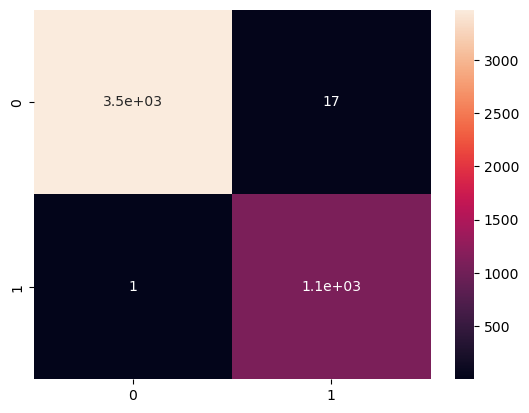

In [87]:
sns.heatmap(cm, annot=True)

In [88]:
y_predict_test=NB_classifier.predict(X_test)
y_predict_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [89]:
cm=confusion_matrix(y_test,y_predict_test)
cm

array([[863,  10],
       [  2, 271]], dtype=int64)

<Axes: >

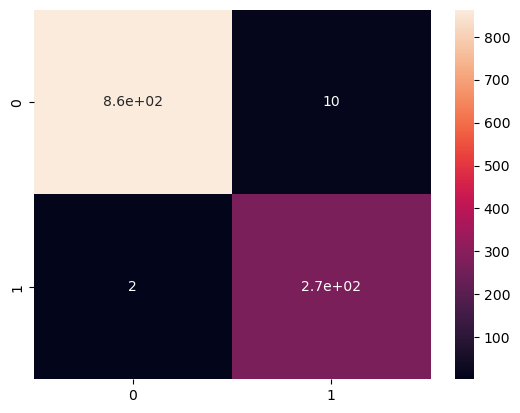

In [90]:
sns.heatmap(cm, annot=True)

In [92]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       873
           1       0.96      0.99      0.98       273

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

